<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04



## Problema 01

<img src="https://drive.google.com/uc?export=view&id=1LkStfZqwS8AOm_xja6KDWWQMQV2ijrDu" width = "300" align="center"/>

EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [21]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_04/data/company_sales_data.csv")
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

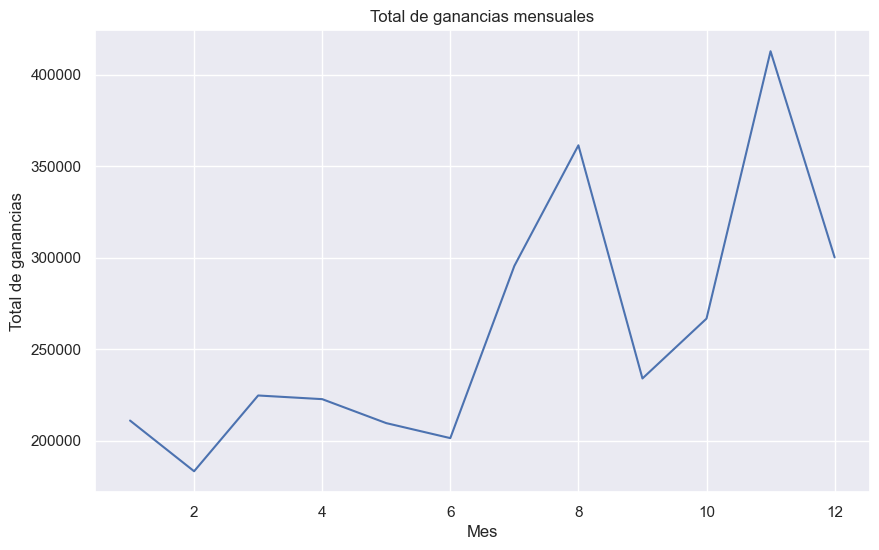

In [22]:
# crea el gráfico

plt.figure(figsize=(10,6))
sns.lineplot(
    x = 'month_number',
    y = 'total_profit',
    data = df,
    errorbar = None,
)

# agrega características de matplotlib en seaborn

plt.xlabel('Mes')
plt.ylabel('Total de ganancias')
plt.title('Total de ganancias mensuales')

# muestra el gráfico
plt.show()

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

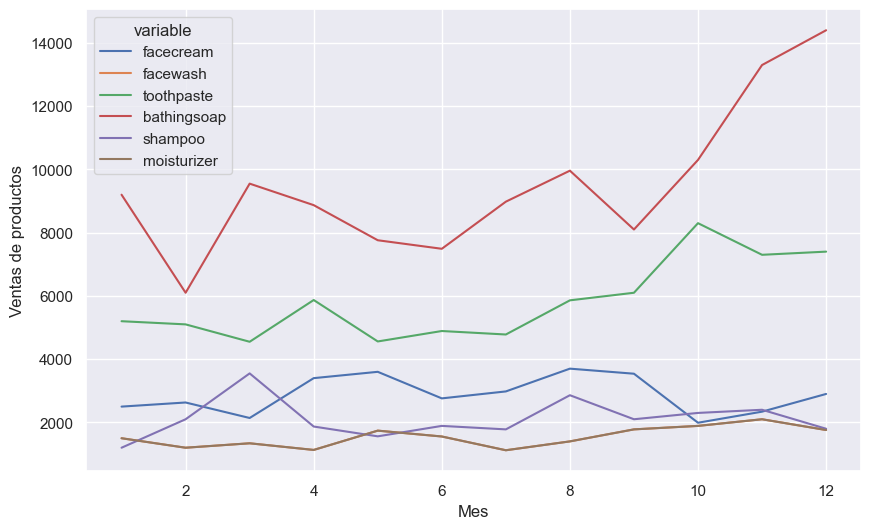

In [28]:
# seleccionamos los datos

columnas = ['month_number','facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer']
df_temp = df[columnas]
df_melt = df_temp.melt(id_vars=['month_number'])

# crea el gráfico

plt.figure(figsize=(10,6))
sns.lineplot(
    data = df_melt,
    x = 'month_number',
    y = 'value',
    hue = 'variable'
)

# agrega características al gráfico
 es "''"
plt.xlabel('Mes')
plt.ylabel('Ventas de productos')

# muestra el gráfico

plt.show()

A partir del gráfico concluimos que el producto con más ventas a nivel general es "bathingsoap", además, el gráfico multilínea facilitay permite una mejor visualización del comportamiento de los datos a lo largo de los meses. 

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

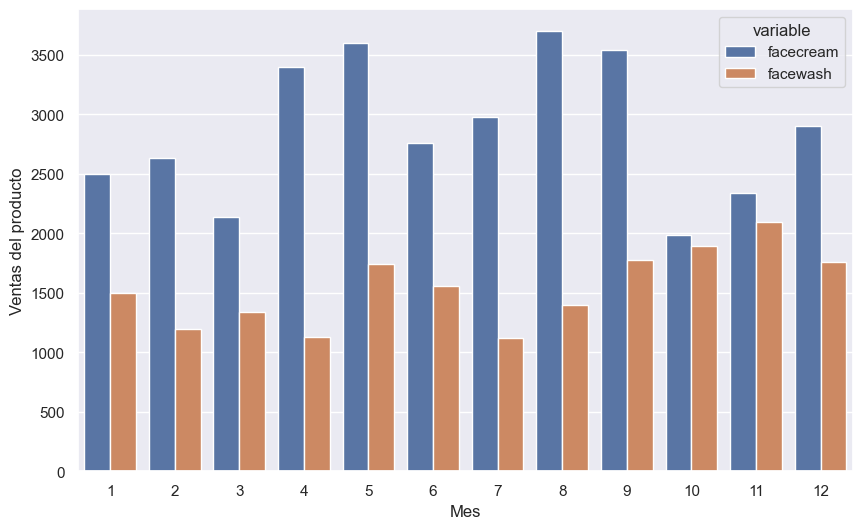

In [29]:
# selecciona los datos a utilizar

df2 = df_melt.loc[lambda x: x['variable'].isin(["facecream","facewash"])]

# crea el gráfico

plt.figure(figsize=(10,6))
sns.barplot(
    data = df2,
    x = 'month_number',
    y = 'value',
    hue = 'variable'
)

# agrega características al gráfico

plt.xlabel('Mes')
plt.ylabel('Ventas del producto')

# muestra el gráfico 

plt.show()

Es claro ver que el producto "facecream" tuvo más ventas que "facewash" a lo largo de todos los meses. Gracias a que ambos productos se encuentran en el mismo gráfico de barra su comparación se puede efectuar de manera más eficaz.

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

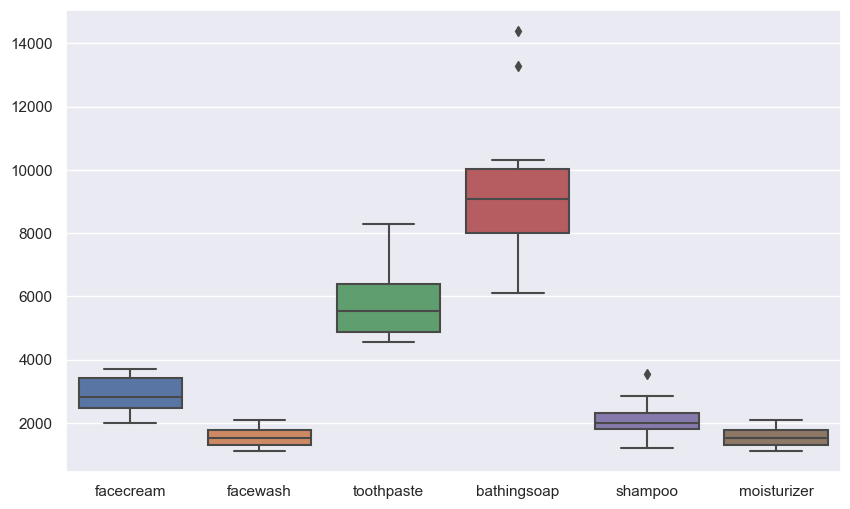

In [30]:
# selecciona los datos que se estudiarán

columnas = columnas = ['facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer']
stats_df = df[columnas]

# crea el gráfico

plt.figure(figsize=(10,6))
sns.boxplot(data=stats_df)

# muestra el gráfico

plt.show()

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

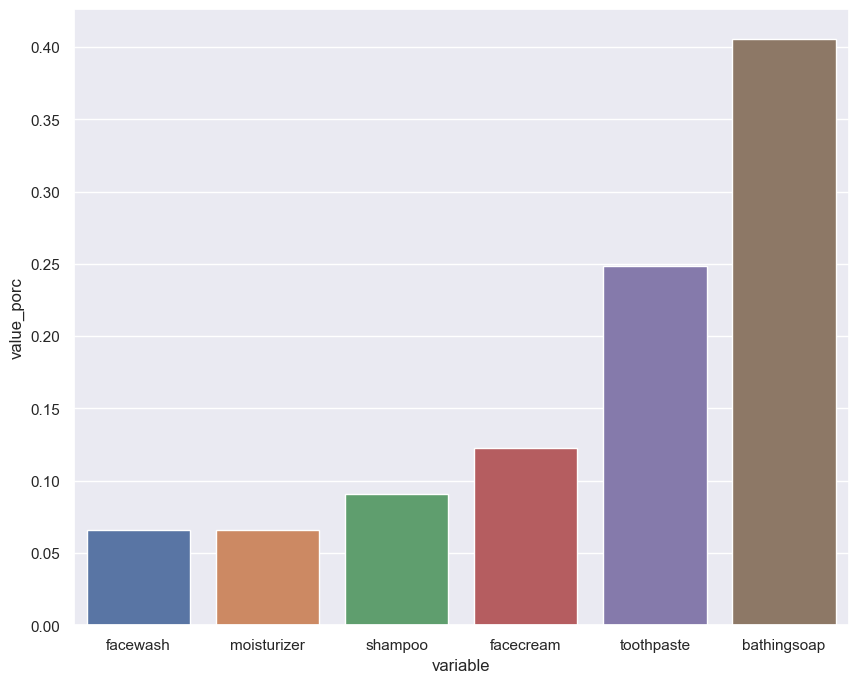

In [32]:
# selecciona y ordena de menor a mayor los datos a utilizar

df_group = df_melt.groupby('variable')['value'].sum().reset_index().sort_values('value')
df_group['value_porc']=df_group['value']/df_group['value'].sum()

# crea el gráfico

sns.barplot(
    data = df_group,
    x = 'variable',
    y = 'value_porc',
)

# muestra el gráfico

plt.show()

En lugar de usar un gráfico circular, por lo visto en clases es mejor trabajar con gráficos de barra ya que permite visualizar de mejor manera las proporciones de cada producto con respecto al total. En este caso cada producto representa su valor con respecto a la venta total.